IMPORTS

In [1]:
import lightgbm as lgb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

FILE_PATH: str = "../datasets/clean/combined-data.csv"


READ DATA

In [2]:
# Read the CSV file
data = pd.read_csv(FILE_PATH)

# Display the first few rows of the DataFrame
data.head()


,Country,1970_co2_total,1971_co2_total,1972_co2_total,1973_co2_total,1974_co2_total,1975_co2_total,1976_co2_total,1977_co2_total,1978_co2_total,...,2012_surface_temperature,2013_surface_temperature,2014_surface_temperature,2015_surface_temperature,2016_surface_temperature,2017_surface_temperature,2018_surface_temperature,2019_surface_temperature,2020_surface_temperature,2021_surface_temperature
0,Angola,8.952570,8.538308,10.388519,11.372301,11.833761,10.930423,7.317385,12.057774,14.239234,...,0.552,1.044,0.828,1.331,1.609,0.870,1.395,1.752,1.162,1.553
1,Anguilla,0.002168,0.002168,0.002264,0.002109,0.002350,0.002584,0.002434,0.002537,0.002902,...,0.640,0.770,0.814,1.051,1.125,0.960,0.664,0.843,1.224,0.893
2,Albania,4.814516,4.814828,5.498804,4.939869,5.319746,5.414438,5.785733,6.197670,6.820001,...,1.487,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536
3,United Arab Emirates,19.437564,25.404108,27.718761,35.806205,35.971039,36.642262,45.538708,45.835847,52.580154,...,1.086,0.739,0.909,1.556,1.059,1.632,1.498,1.204,1.210,1.699
4,Argentina,88.321009,88.765100,90.716408,93.698462,93.987211,91.411464,96.029610,100.067600,99.336340,...,0.798,0.442,0.951,0.957,0.488,1.095,0.878,0.760,1.123,1.031


PROCESS DATA AND PLOT

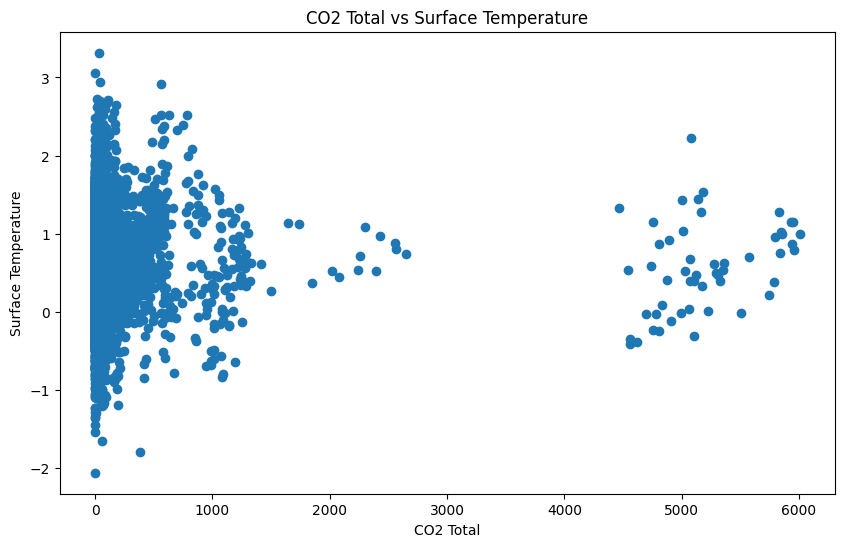

In [3]:
# Split the data into X and Y
X = data.filter(regex="co2_total")
Y = data.filter(regex="surface_temperature")
X_values = X.values.flatten()
Y_values = Y.values.flatten()

plt.figure(figsize=(10, 6))
plt.scatter(X_values, Y_values)
plt.xlabel("CO2 Total")
plt.ylabel("Surface Temperature")
plt.title("CO2 Total vs Surface Temperature")
plt.show()


TRAIN MODEL

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_values,Y_values,random_state=42,test_size=0.2)
X_train = X_train.reshape(-1, 1)
X_valid = X_valid.reshape(-1, 1)
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_valid, label=y_valid)

parameters = {
    "objective": "regression",
    "metric": "l2",
    "boosting_type": "gbdt",
    "verbose": -1,
    "num_leaves": 100,
    "learning_rate": 0.1,
    "feature_fraction": 0.85,
}


In [5]:
model_lgbm = lgb.train(
    parameters,
    train_data,
    valid_sets=valid_data,
    num_boost_round=5000
)


In [6]:
from sklearn.metrics import mean_squared_error

# Make predictions
y_train_pred = model_lgbm.predict(X_train, num_iteration=model_lgbm.best_iteration)
y_valid_pred = model_lgbm.predict(X_valid, num_iteration=model_lgbm.best_iteration)

# Print RMSE
print("The RMSE of prediction on training set is: ", mean_squared_error(y_train, y_train_pred) ** 0.5)
print("The RMSE of prediction on validation set is: ", mean_squared_error(y_valid, y_valid_pred) ** 0.5)


The RMSE of prediction on training set is:  0.5587627539749968
The RMSE of prediction on validation set is:  0.5769777951516345


In [7]:
# Assuming X_test is your test data
X_test = np.array([1.5]).reshape(-1, 1)
y_test_pred = model_lgbm.predict(X_test, num_iteration=model_lgbm.best_iteration)

print("The predicted value for 1.5 is:", y_test_pred[0])


The predicted value for 1.5 is: 0.4001818148767694


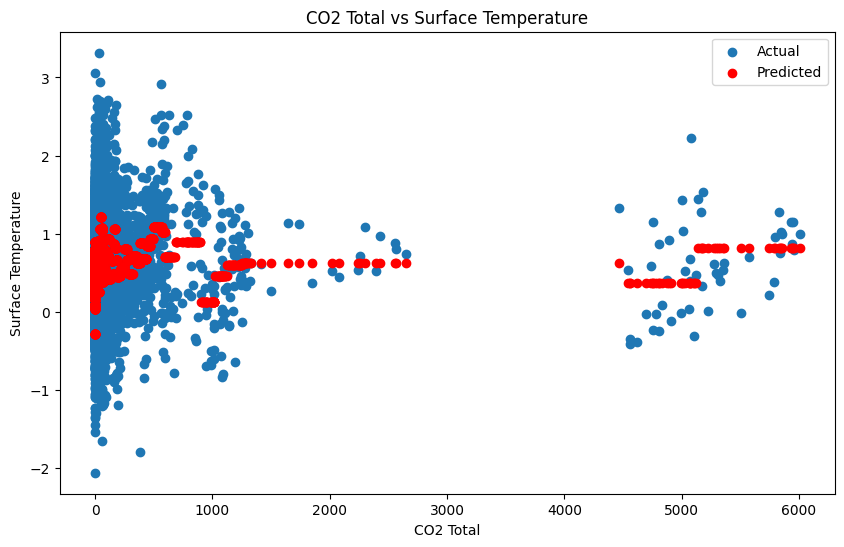

In [8]:
# Make predictions
X_values_2D = X_values.reshape(-1, 1)  # Reshape to 2D array as required by the model
Y_pred = model_lgbm.predict(X_values_2D, num_iteration=model_lgbm.best_iteration)

plt.figure(figsize=(10, 6))

# Plot the actual data
plt.scatter(X_values, Y_values, label="Actual")

# Plot the predicted data
plt.scatter(X_values, Y_pred, color="r", label="Predicted")

plt.xlabel("CO2 Total")
plt.ylabel("Surface Temperature")
plt.title("CO2 Total vs Surface Temperature")
plt.legend()
plt.show()
